In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from preprocess import get_results, mean_aggregate_results, get_results_mod

GENERATE_PNGS = True
pd.options.display.float_format = '{:.1f}'.format

In [2]:
ts, es = [], []

# waiting for more results to be generated ...
for i in range(9, 14):
	t, e = get_results(f'../results_final_{i}')
	ts.append(t)
	es.append(e)

training, evaluation = mean_aggregate_results(ts, es)

### LibTorch: native and imported models

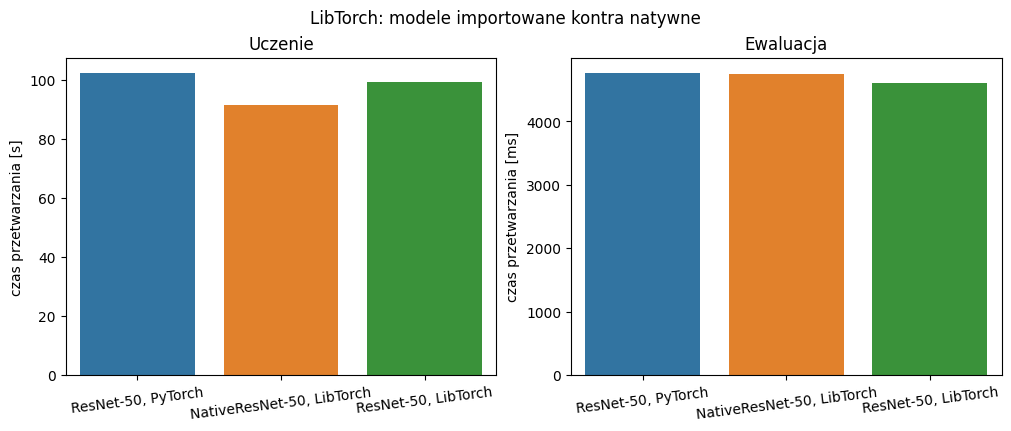

In [3]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(10, 4.2)
fig.suptitle('LibTorch: modele importowane kontra natywne')

resnet = training[((training.model_name == 'ResNet-50') | (training.model_name == 'NativeResNet-50')) & (training.framework != 'Matlab')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet = resnet[resnet.epoch == 5].drop(columns=['epoch'])
resnet['model'] = resnet.pop('model_name') + ', ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=7)
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

resnet = evaluation[((evaluation.model_name == 'ResNet-50') | (evaluation.model_name == 'NativeResNet-50')) & (evaluation.framework != 'Matlab')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet['model'] = resnet.pop('model_name') + ', ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=7)
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported.png')

### Classification: LibTorch vs PyTorch
* dlaczego libtorch nie jest duzo szybszy od pytorcha? dla szkolenia jeszcze rozumiem, ale dla inferencji? przeciez libtorcha wykorzystuje sie wlasnie gdzie potrzeba jest low latency  
* dlaczego scvnet w pytorchu jest taki wolny? juz nawet nie w porownaniu z tf tylko nawet z libtorchem, a to przeciez ta sama architektura na tym samym silniku obliczeniowy
  * bo na każdej warstwie było implicit cast, juz poprawine i smiga 

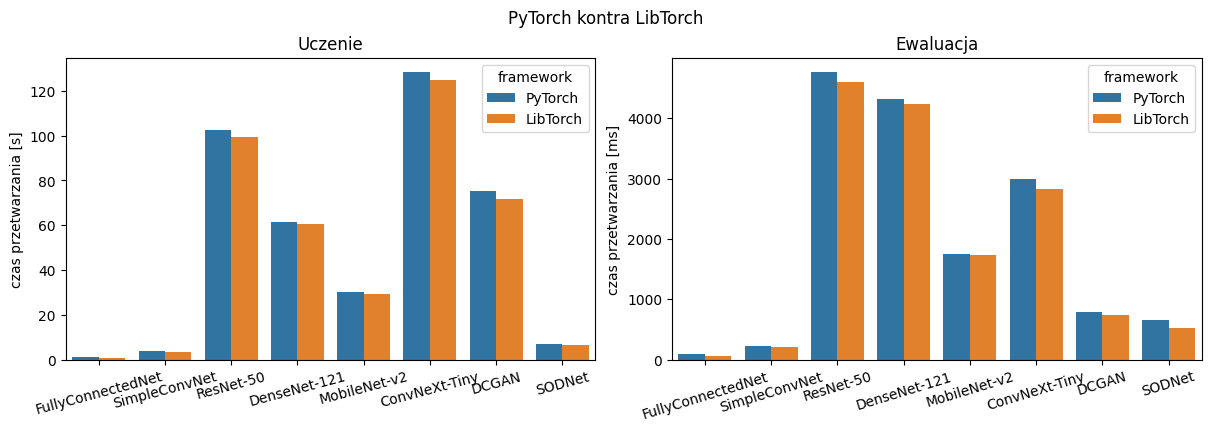

In [4]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(12, 4.2)
fig.suptitle('PyTorch kontra LibTorch')

clfs = training[(training.framework == 'PyTorch') | (training.framework == 'LibTorch')] 
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15)
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

clfs = evaluation[(evaluation.framework == 'PyTorch') | (evaluation.framework == 'LibTorch')]
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
# clfs = clfs[clfs.model_name != 'SODNet']
clfs = clfs[clfs.model_name != 'CELEBA']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=17)
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch.png')

### Classification: Torch vs. TensorFlow

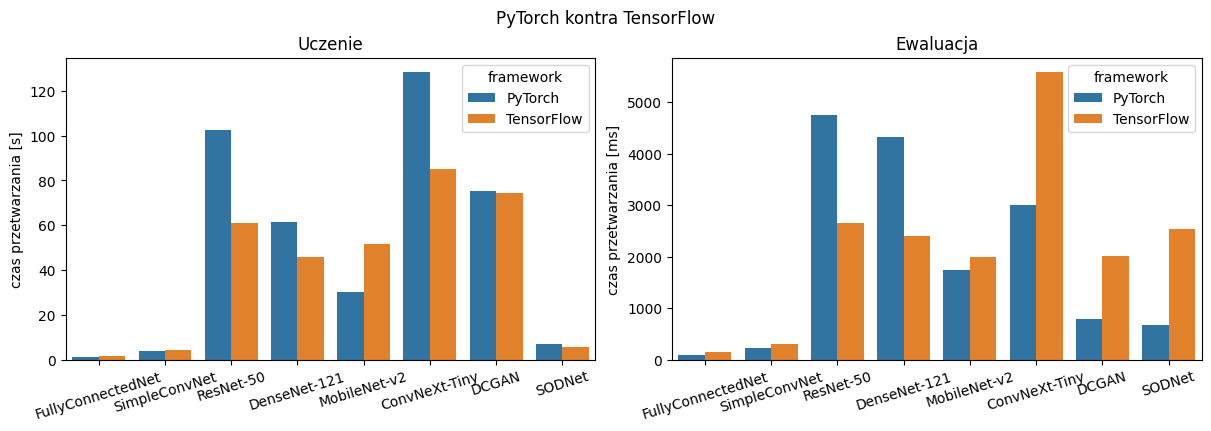

In [5]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(12, 4.2)
fig.suptitle('PyTorch kontra TensorFlow')

clfs = training[training.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
# clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=17)
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

clfs = evaluation[evaluation.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
clfs = clfs[clfs.model_name != 'CELEBA']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=17)
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/torch_vs_tensorflow.png')

### LibTorch vs cuDNN: Is it worth the hassle?

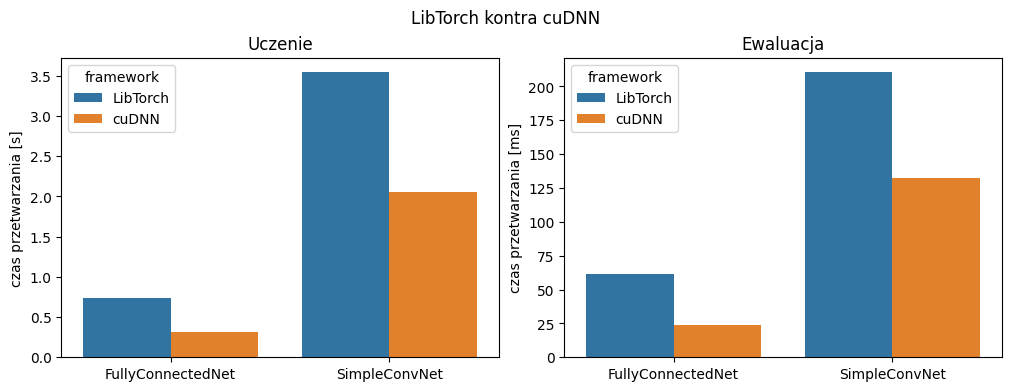

In [6]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(10, 3.8)
fig.suptitle('LibTorch kontra cuDNN')

clfs = training[(training.framework == 'cuDNN') | (training.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[0])
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

clfs = evaluation[(evaluation.framework == 'cuDNN') | (evaluation.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[1])
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_train.png')

### Matlab

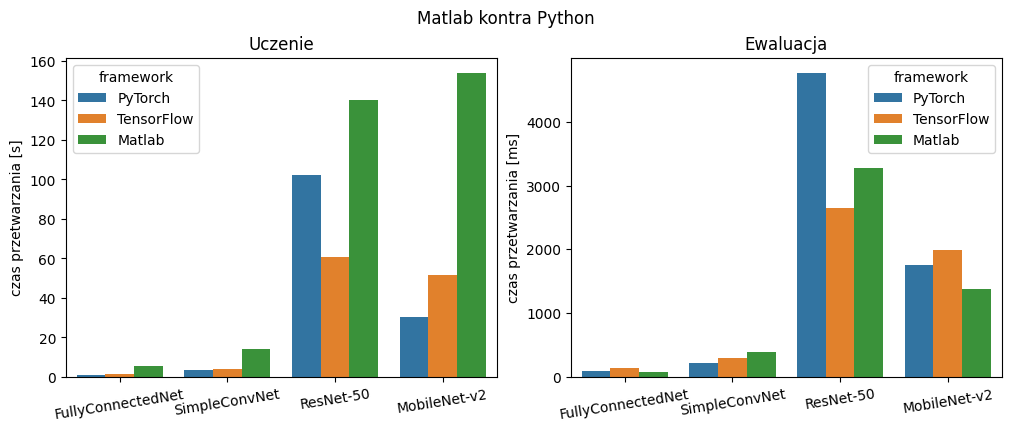

In [7]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(10, 4.2)
fig.suptitle('Matlab kontra Python')

clfs = training[(training.framework != 'LibTorch') & (training.framework != 'cuDNN')]
clfs = clfs[clfs.epoch == 2].drop(columns=['epoch'])
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet') | (clfs.model_name == 'ResNet-50')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=9)
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

clfs = evaluation[(evaluation.framework != 'LibTorch') & (evaluation.framework != 'cuDNN')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet') | (clfs.model_name == 'ResNet-50')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=9)
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab.png')

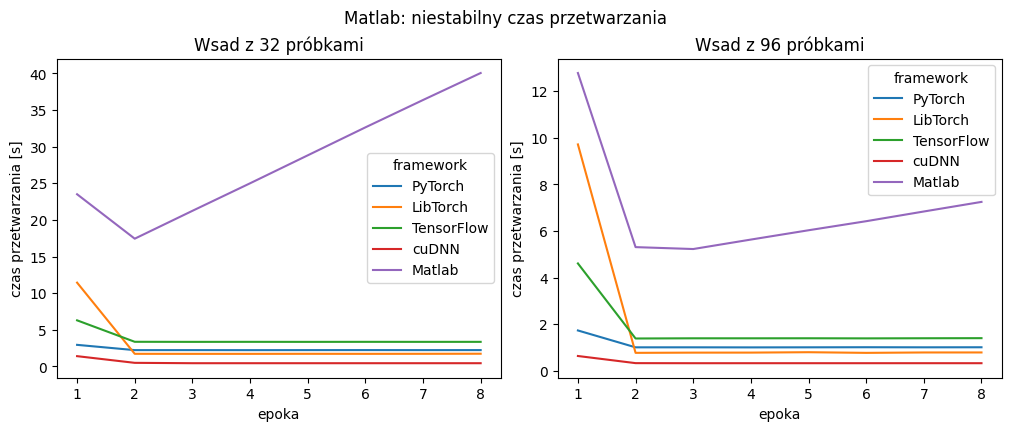

In [8]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(10, 4.2)
fig.suptitle('Matlab: niestabilny czas przetwarzania')

t_32, _ = get_results_mod('../results_32')
t_96, _ = get_results_mod('../results_96')

sns.lineplot(data=t_32, x='epoch', y='elapsed_time', hue='framework', ax=axes[0])
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('epoka')
axes[0].set_title('Wsad z 32 próbkami')

sns.lineplot(data=t_96, x='epoch', y='elapsed_time', hue='framework', ax=axes[1])
axes[1].set_ylabel('czas przetwarzania [s]')
axes[1].set_xlabel('epoka')
axes[1].set_title('Wsad z 96 próbkami')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_nonconst_time.png')

### DCGAN - generative adversial network

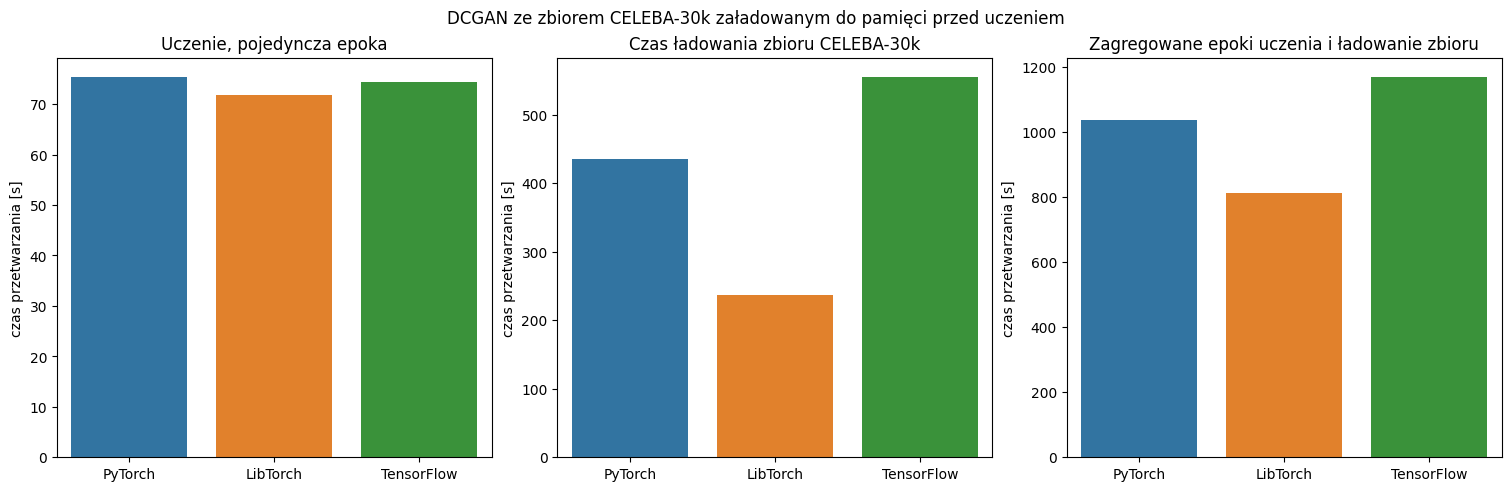

In [9]:
fig, axes = plt.subplots(1,3, constrained_layout=True)
fig.set_size_inches(15, 4.8)
fig.suptitle('DCGAN ze zbiorem CELEBA-30k załadowanym do pamięci przed uczeniem')

dcgan = training[training.model_name == 'DCGAN']
dcgan = dcgan[dcgan.epoch == 5].drop(columns=['epoch'])
order = dcgan.framework.unique()
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[0], order=order)
axes[0].set_title('Uczenie, pojedyncza epoka')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

dcgan = evaluation[evaluation.model_name == 'CELEBA'].copy()
dcgan.elapsed_time /= 1e3 # ms to s
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[1], order=order)
axes[1].set_title('Czas ładowania zbioru CELEBA-30k')
axes[1].set_ylabel('czas przetwarzania [s]')
axes[1].set_xlabel('')

dcgan = training[training.model_name == 'DCGAN'].groupby('framework')['elapsed_time'].sum()
celeba = evaluation[evaluation.model_name == 'CELEBA'].groupby('framework')['elapsed_time'].sum() / 1e3 # ms to s
agg = (dcgan + celeba).reset_index()
sns.barplot(data=agg, x='framework', y='elapsed_time', ax=axes[2], order=order)
axes[2].set_title('Zagregowane epoki uczenia i ładowanie zbioru')
axes[2].set_ylabel('czas przetwarzania [s]')
axes[2].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_celeba_comp.png')

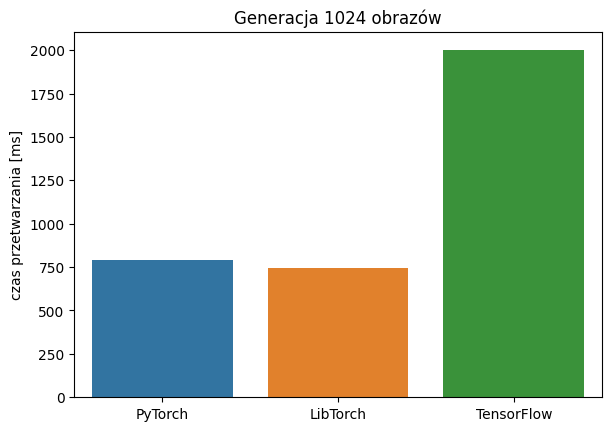

In [10]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
fig.set_size_inches(6, 4.2)

sodnet = evaluation[evaluation.model_name == 'DCGAN']
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('Generacja 1024 obrazów')
ax.set_ylabel('czas przetwarzania [ms]')
ax.set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_gen_comp.png')

# SODNet - single object detection

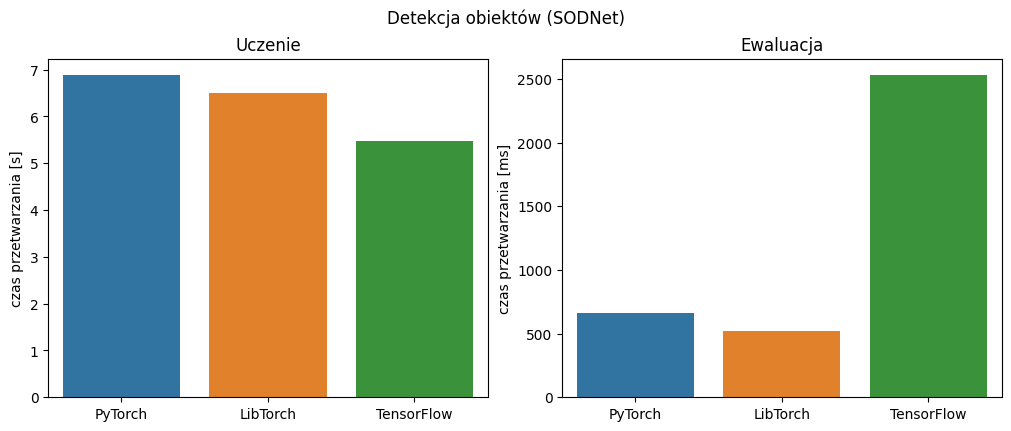

In [11]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(10, 4.2)
fig.suptitle('Detekcja obiektów (SODNet)')

sodnet = training[training.model_name == 'SODNet']
sodnet = sodnet[sodnet.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=axes[0])
axes[0].set_title('Uczenie')
axes[0].set_ylabel('czas przetwarzania [s]')
axes[0].set_xlabel('')

sodnet = evaluation[evaluation.model_name == 'SODNet']
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=axes[1])
axes[1].set_title('Ewaluacja')
axes[1].set_ylabel('czas przetwarzania [ms]')
axes[1].set_xlabel('')

if GENERATE_PNGS:
	fig.savefig('./plots/sodnet.png')